# Linear Regression and Temperature

In this notebook, we'll look at using linear regression to study changes in temperature.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%config InlineBackend.figure_format ='retina'

## Getting our data

We'll be getting data from [North America Land Data Assimilation System (NLDAS)](https://wonder.cdc.gov/NASA-NLDAS.html), which provides the daily average temperature from 1979-2011 for the United States.

For the next step, you will need to choose some settings in the data request form. These are:

- GroupBy: Month Day, Year
- Your State
- Export Results (check box)
- Show Zero Values (check box)

>1) Download the data for your home state (or state of your choosing) and upload it to M2 in your work directory.

# Loading our data

In [2]:
df = pd.read_csv('North America Land Data Assimilation System (NLDAS) Daily Air Temperatures and Heat Index (1979-2011).txt',delimiter='\t',skipfooter=14,engine='python')

In [3]:
df

,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,NaN,"Jan 01, 1979",1979/01/01,29.03
1,NaN,"Jan 02, 1979",1979/01/02,31.35
2,NaN,"Jan 03, 1979",1979/01/03,41.66
3,NaN,"Jan 04, 1979",1979/01/04,47.30
4,NaN,"Jan 05, 1979",1979/01/05,46.89
...,...,...,...,...
12049,NaN,"Dec 28, 2011",2011/12/28,59.91
12050,NaN,"Dec 29, 2011",2011/12/29,66.64
12051,NaN,"Dec 30, 2011",2011/12/30,68.61
12052,NaN,"Dec 31, 2011",2011/12/31,73.49


### Clean the data

>2) Drop any rows that have the value "Total" in the Notes column, then drop the Notes column

In [4]:
df = df[df.Notes != 'Total']
df = df.drop('Notes', 1)
df

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,"Jan 01, 1979",1979/01/01,29.03
1,"Jan 02, 1979",1979/01/02,31.35
2,"Jan 03, 1979",1979/01/03,41.66
3,"Jan 04, 1979",1979/01/04,47.30
4,"Jan 05, 1979",1979/01/05,46.89
...,...,...,...
12048,"Dec 27, 2011",2011/12/27,56.67
12049,"Dec 28, 2011",2011/12/28,59.91
12050,"Dec 29, 2011",2011/12/29,66.64
12051,"Dec 30, 2011",2011/12/30,68.61


>3) Make a column called Date that is in the pandas datetime format

In [5]:
df['Date'] = pd.to_datetime(df['Month Day, Year'], errors = 'raise')
df

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date
0,"Jan 01, 1979",1979/01/01,29.03,1979-01-01
1,"Jan 02, 1979",1979/01/02,31.35,1979-01-02
2,"Jan 03, 1979",1979/01/03,41.66,1979-01-03
3,"Jan 04, 1979",1979/01/04,47.30,1979-01-04
4,"Jan 05, 1979",1979/01/05,46.89,1979-01-05
...,...,...,...,...
12048,"Dec 27, 2011",2011/12/27,56.67,2011-12-27
12049,"Dec 28, 2011",2011/12/28,59.91,2011-12-28
12050,"Dec 29, 2011",2011/12/29,66.64,2011-12-29
12051,"Dec 30, 2011",2011/12/30,68.61,2011-12-30


>4) Make columns for 'Year', 'Month', and 'Day' by splitting the column 'Month Day, Year'

In [6]:
df['Year'] = df['Date'].map(lambda x: x.year)
df['Month'] = df['Date'].map(lambda x: x.month)
df['Day'] = df['Date'].map(lambda x: x.day)
df

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date,Year,Month,Day
0,"Jan 01, 1979",1979/01/01,29.03,1979-01-01,1979,1,1
1,"Jan 02, 1979",1979/01/02,31.35,1979-01-02,1979,1,2
2,"Jan 03, 1979",1979/01/03,41.66,1979-01-03,1979,1,3
3,"Jan 04, 1979",1979/01/04,47.30,1979-01-04,1979,1,4
4,"Jan 05, 1979",1979/01/05,46.89,1979-01-05,1979,1,5
...,...,...,...,...,...,...,...
12048,"Dec 27, 2011",2011/12/27,56.67,2011-12-27,2011,12,27
12049,"Dec 28, 2011",2011/12/28,59.91,2011-12-28,2011,12,28
12050,"Dec 29, 2011",2011/12/29,66.64,2011-12-29,2011,12,29
12051,"Dec 30, 2011",2011/12/30,68.61,2011-12-30,2011,12,30


In [7]:
df['DateInt'] = df['Date'].astype(int)/10e10 # This will be used later

## Generating a scatter plot

> 4) Use df.plot.scatter to plot 'Date' vs 'Avg Daily Max Air Temperature (F)'. You might want to add figsize=(50,5) as an argument to make it more clear what is happening.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

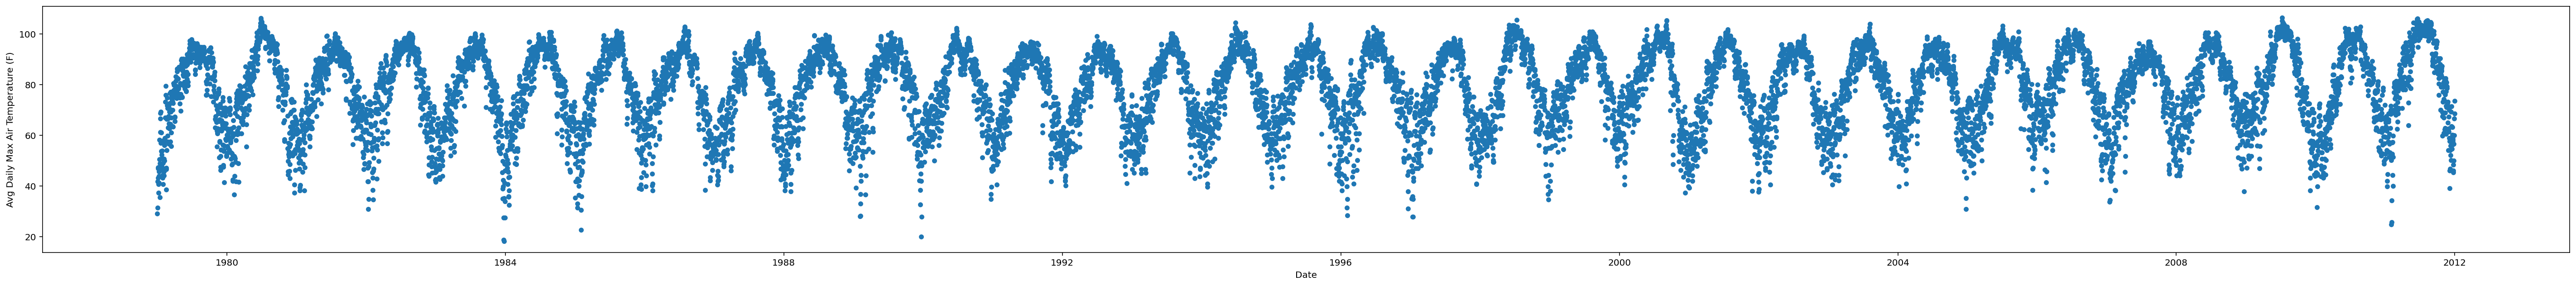

In [8]:
df.plot.scatter('Date', 'Avg Daily Max Air Temperature (F)', figsize=(50, 5))

>5) Describe your plot.

In [9]:
#The plot looks like a lot of quadratic equations with an absolute maximum put together in a row.

### Adding colors for our graph

In [10]:
# No need to edit this unless you want to try different colors or a pattern other than colors by month

cmap = matplotlib.cm.get_cmap("nipy_spectral", len(df['Month'].unique())) # Builds a discrete color mapping using a built in matplotlib color map

c = []
for i in range(cmap.N): # Converts our discrete map into Hex Values
    rgba = cmap(i)
    c.append(matplotlib.colors.rgb2hex(rgba))

df['color']=[c[int(i-1)] for i in df['Month'].astype(int)] # Adds a column to our dataframe with the color we want for each row

>6) Make the same plot as 4) but add color by adding the argument c=df\['color'\] to our plotting command.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

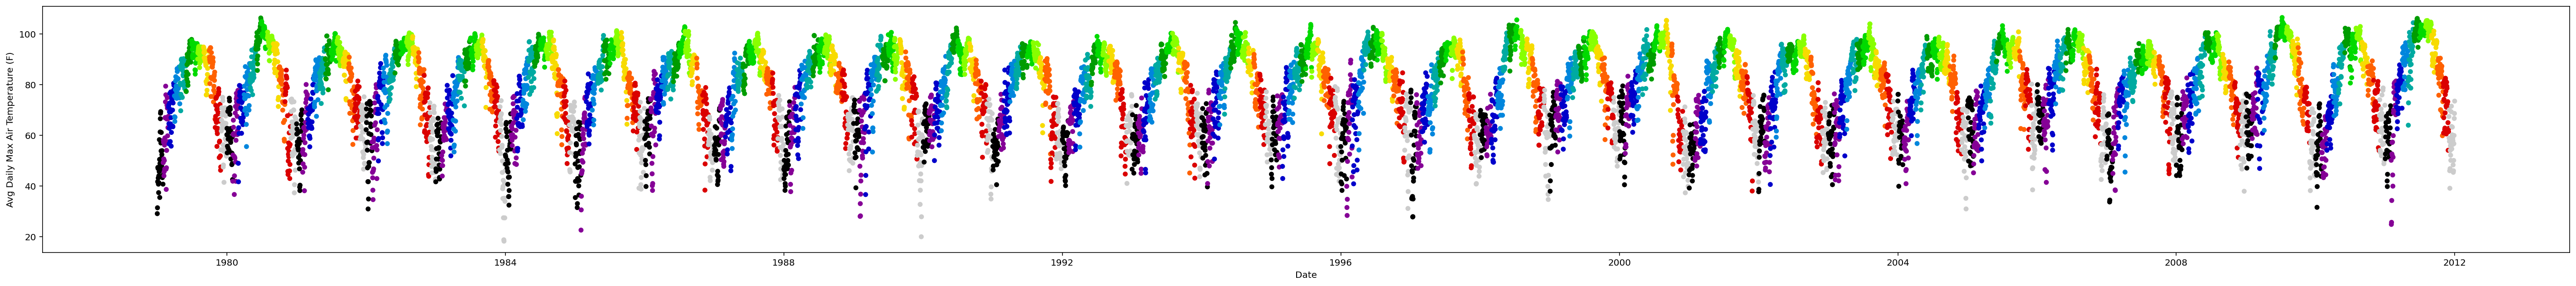

In [11]:
df.plot.scatter('Date', 'Avg Daily Max Air Temperature (F)', figsize=(50, 5), c=df['color'])

## Pick a subset of the data

>7) Select a 6 month period from the data. # Hint use logic and pd.datetime(YYYY, MM, DD)

In [12]:
df7 = df[df['Year'] == 2002]
month6 = df7[df7['Month'] < 7]
month6

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date,Year,Month,Day,DateInt,color
8401,"Jan 01, 2002",2002/01/01,37.69,2002-01-01,2002,1,1,10098432.0,#000000
8402,"Jan 02, 2002",2002/01/02,38.65,2002-01-02,2002,1,2,10099296.0,#000000
8403,"Jan 03, 2002",2002/01/03,44.89,2002-01-03,2002,1,3,10100160.0,#000000
8404,"Jan 04, 2002",2002/01/04,51.30,2002-01-04,2002,1,4,10101024.0,#000000
8405,"Jan 05, 2002",2002/01/05,53.79,2002-01-05,2002,1,5,10101888.0,#000000
...,...,...,...,...,...,...,...,...,...
8577,"Jun 26, 2002",2002/06/26,95.06,2002-06-26,2002,6,26,10250496.0,#009c00
8578,"Jun 27, 2002",2002/06/27,92.65,2002-06-27,2002,6,27,10251360.0,#009c00
8579,"Jun 28, 2002",2002/06/28,91.58,2002-06-28,2002,6,28,10252224.0,#009c00
8580,"Jun 29, 2002",2002/06/29,88.80,2002-06-29,2002,6,29,10253088.0,#009c00


>8) Plot the subset using the the same code you used in 6). You can change the figsize if needed.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

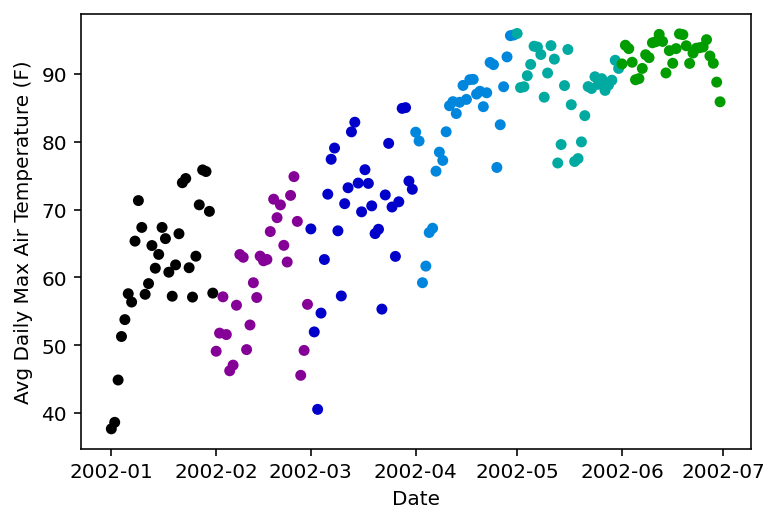

In [14]:
month6.plot.scatter('Date', 'Avg Daily Max Air Temperature (F)', c=month6['color'])

## Linear Regression

We are going to use a very [simple linear regression model](https://en.wikipedia.org/wiki/Simple_linear_regression). You may implement a more complex model if you wish.

The method described here is called the least squares method and is defined as:

$m = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}))}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$

$b = \bar{y} - m\bar{x}$

Where $\bar{x}$ and $\bar{y}$ are the average value of $x$ and $y$ respectively.

First we need to define our X and Y values.

In [21]:
X=month6['DateInt'].values
Y=month6['Avg Daily Max Air Temperature (F)'].values

In [22]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [23]:
Y_pred = lin_reg(X,Y)

0.00028231764995116746 -2797.0404893449095


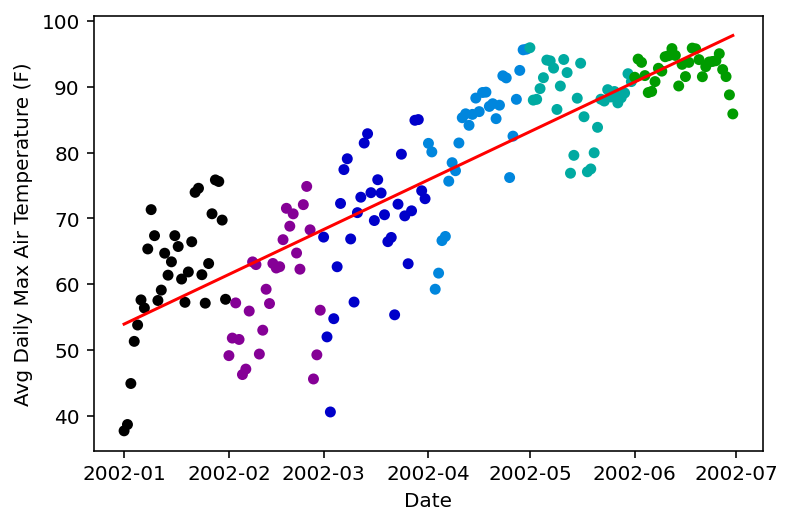

In [24]:
month6.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',c=month6['color'])
plt.plot([min(month6['Date'].values), max(month6['Date'].values)], [min(Y_pred), max(Y_pred)], color='red') # best fit line
plt.show()

>9) What are the slope and intercept of your best fit line?

In [ ]:
#slope = 0.00028231764995116746
#y-intercept = -2797.0404893449095

>10) What are the minimum and maximum Y values of your best fit line? Is your slope positive or negative?

In [28]:
#minimum Y value
print(min(Y_pred))

#maximum Y value
print(max(Y_pred))

53.92510108675833
97.83114200716409


## Putting it all together

>11) Generate a best fit line for the full data set and plot the line over top of the data.

In [29]:
#declare x and y values for full data set
xFull=month6['DateInt'].values
yFull=month6['Avg Daily Max Air Temperature (F)'].values

In [30]:
Y_full = lin_reg(xFull,yFull)

0.00028231764995116746 -2797.0404893449095


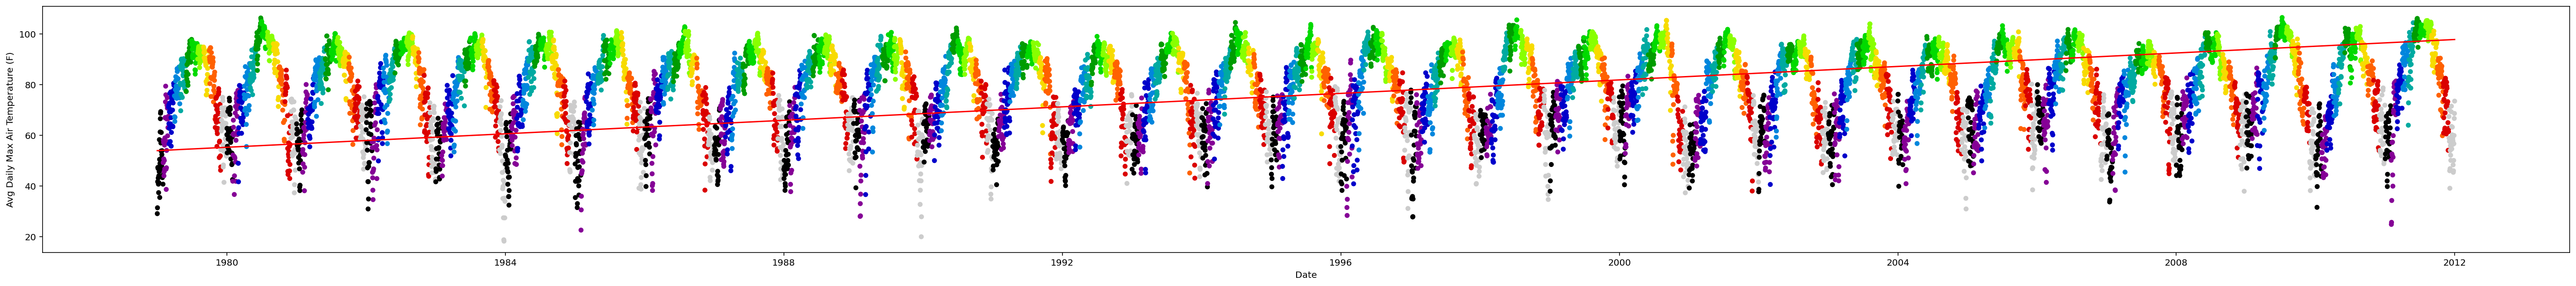

In [37]:
#plot line over top of data
df.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)', figsize = (50, 5), c=df['color'])
plt.plot([min(df['Date'].values), max(df['Date'].values)], [min(Y_full), max(Y_full)], color='red') # best fit line
plt.show()

>12) Is the slope positive or negative? What do you think that means?

In [ ]:
#The slope is positive
#That means that the rate at which the temperature increases as time passes is increasing. 